In [6]:
using BeamLib: IsotropicArray, steerphi, capon
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n

# Capon spectrum 
# Same as steering capon_weights / mpdr_weights 
# but using the capon function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = capon.(Ref(pa), Ref(X), Ref(fc), deg2rad.(ϕaxis))

360-element Vector{ComplexF64}:
 0.34923377120010507 - 2.0493937279369003e-16im
  0.3486394037217967 - 1.0679228261559833e-15im
 0.34685872209118573 - 7.069533552960576e-16im
 0.34389936761305173 + 4.3787747780410385e-16im
 0.33977529226642755 - 2.0398537433826216e-16im
  0.3345084236127112 - 1.7771384030829967e-16im
 0.32813068727228145 + 1.6666366541988264e-16im
 0.32068610640962236 - 3.1894258857636263e-16im
  0.3122326604800685 + 2.789054170660878e-16im
 0.30284358332333927 - 3.6385904296636627e-16im
                     ⋮
  0.3659098389384721 + 1.5729953698891048e-16im
  0.3569028727076504 - 4.996097502664211e-16im
 0.34914830373167577 - 9.228117180277093e-16im
 0.34263599379259624 + 4.488361204418737e-16im
 0.33734753481852403 - 2.327662480243228e-16im
  0.3332619436944077 - 3.256872971932158e-16im
   0.330359597583459 - 5.948479563928486e-16im
 0.32862486447768147 - 1.0145996686544853e-15im
  0.3280477614707546 + 4.0871000504587343e-16im

In [7]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(abs.(P)).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

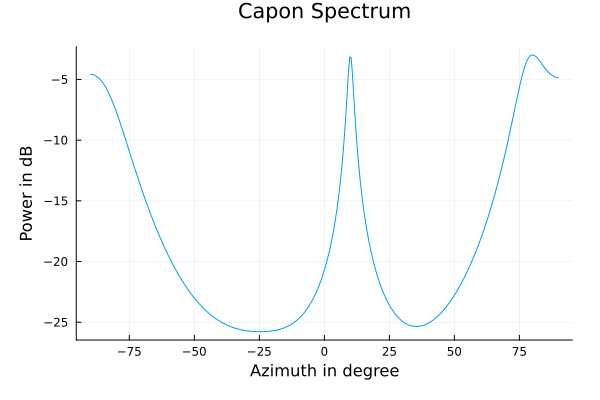

In [8]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(abs.(P)))
plot!(title="Capon Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")